In [58]:
import matplotlib.pyplot as plt
import networkx as nx

In [59]:
import demon as dem
from pquality.PartitionQuality import pquality_summary
import networkx.algorithms.community as nxcm
from nf1 import NF1

In [60]:
import random
import time

In [61]:
#G = nx.read_gexf("hashtags.gexf")
G0 = nx.read_gexf("weighted-hashtags-w60.gexf")
#GER = nx.Graph()
#GBA = nx.Graph()

In [87]:
#sample by edge
edgeList = list(G.edges)
LableToIntID = {}
for i in range(len(edgeList)):
    LableToIntID[i] = edgeList[i]

In [110]:
#sample by node
nodeList = list(G.nodes)
LableToIntID = {}
for i in range(len(nodeList)):
    LableToIntID[i] = nodeList[i]

In [68]:
#edges
subsize = 2000
randoms = [random.randint(0, len(G.edges()) - 1) for i in range(subsize)]
chosenEdges = [LableToIntID[r] for r in randoms]
len(chosenEdges)

In [111]:
#nodes
subsize = 2000
randoms = [random.randint(0, len(G.nodes()) - 1) for i in range(subsize)]
chosenNodes = [LableToIntID[r] for r in randoms]
len(chosenNodes)

2000

In [112]:
SampleG = nx.Graph()

In [71]:
SampleG.add_edges_from(chosenEdges)

In [113]:
SampleG = G.copy().subgraph(chosenNodes)

In [114]:
len(SampleG.edges())

2073

In [115]:
len(SampleG.nodes())

1833

In [159]:
Gcc=sorted(nx.connected_component_subgraphs(G0), key = len, reverse=True)
GX = Gcc[0]
# Size of the Giant Component
print(len(GX.nodes()))
print(len(GX.edges()))
print(len(G0.nodes()))
print(len(G0.edges()))

955
5425
955
5425


In [83]:
G0 = nx.read_gexf("weighted-hashtags-w60.gexf")

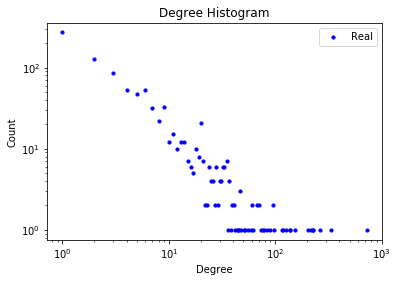

In [84]:
import collections
degree_sequence = sorted([d for n, d in G0.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
ax.scatter(deg, cnt, s=10, c='b', marker="o", label='Real')
plt.legend(loc='upper right')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.show()

In [121]:
#nx.write_gexf(G0, "hashtags-sample1.gexf")

In [101]:
#nx.write_gexf(G, "hashtags.gexf")
#nx.write_gexf(GER, "Erdos-Reyni.gexf")
#nx.write_gexf(GBA, "Barabasi-Albert.gexf")

In [85]:
'''There is a problem in PQuality module. It can not deal with string names. Here I change the node names 
to integers'''

'There is a problem in PQuality module. It can not deal with string names. Here I change the node names \nto integers'

In [86]:
from collections import defaultdict

In [87]:
nodeList = list(G0.nodes)
LableToIntID = {}
for i in range(len(nodeList)):
    LableToIntID[i] = nodeList[i]

In [88]:
inv_map = {v: k for k, v in LableToIntID.items()}

In [89]:
nx.relabel_nodes(G0, inv_map, copy=False)  #LableToIntID

In [90]:
#K-clique:
current_time = time.time()
kc3 = list(nxcm.k_clique_communities(G0, 3))
kc3 = [tuple(i) for i in kc3]
print(len(kc3))
print (time.time()-current_time)
reskc3 = pquality_summary(G0, kc3)
for _, v in reskc3.items():
    print(v)

10
1.4083633422851562
                            value
Index                            
Modularity (no overlap) -0.141082
                       min          max         avg          std
Index                                                           
Internal Density  0.005961     0.250000    0.225596     0.073212
Edges inside      3.000000  5076.000000  514.800000  1520.450907
Average Degree    2.000000    15.546708    4.154671     4.325358
FOMD              0.993874     1.000000    0.999387     0.001838
TPR               1.000000     1.000000    1.000000     0.000000
Expansion         0.333333   240.000000  125.083969    92.489574
Cut Ratio         0.000350     0.252101    0.131529     0.097009
Conductance       0.028517     0.991736    0.775873     0.357590
Normalized Cut    0.142949     1.053998    0.841350     0.321918
Maximum-ODF       1.000000   720.000000  422.900000   260.042093
Average-ODF       0.333333   240.000000  125.083969    92.489574
Flake-ODF         0.000000     

In [91]:
#K-clique:
current_time = time.time()
kc4 = list(nxcm.k_clique_communities(G0, 4))
kc4 = [tuple(i) for i in kc4]
print(len(kc4))
print (time.time()-current_time)
reskc4 = pquality_summary(G0, kc4)
for _, v in reskc4.items():
    print(v)

13
1.1149637699127197
                            value
Index                            
Modularity (no overlap) -0.169055
                         min          max         avg          std
Index                                                             
Internal Density    0.009405     0.250000    0.229570     0.063902
Edges inside        6.000000  4731.000000  376.615385  1257.045042
Average Degree      3.000000    18.848606    5.572970     4.173875
FOMD                0.994024     1.000000    0.999540     0.001592
TPR                 1.000000     1.000000    1.000000     0.000000
Expansion           1.189243   213.500000  113.155216    64.561135
Cut Ratio           0.002625     0.224501    0.119204     0.067690
Conductance         0.059350     0.986143    0.871306     0.247015
Normalized Cut      0.360106     1.059185    0.942583     0.191323
Maximum-ODF       193.000000   719.000000  522.615385   213.971076
Average-ODF         1.189243   213.500000  113.155216    64.561135
Flake

In [92]:
#K-clique:
current_time = time.time()
kc5 = list(nxcm.k_clique_communities(G0, 5))
kc5 = [tuple(i) for i in kc5]
print(len(kc5))
print (time.time()-current_time)
reskc5 = pquality_summary(G0, kc5)
for _, v in reskc5.items():
    print(v)

13
1.0407724380493164
                            value
Index                            
Modularity (no overlap) -0.201537
                        min          max         avg          std
Index                                                            
Internal Density   0.013262     0.250000    0.228584     0.063135
Edges inside      10.000000  4426.000000  357.384615  1174.553371
Average Degree     4.000000    21.643032    6.562284     4.608009
FOMD               0.992665     1.000000    0.999436     0.001955
TPR                1.000000     1.000000    1.000000     0.000000
Expansion          2.097800   189.600000   96.899251    59.753705
Cut Ratio          0.003842     0.199579    0.102211     0.062693
Conductance        0.088363     0.979339    0.844977     0.242281
Normalized Cut     0.388783     1.059828    0.916670     0.196404
Maximum-ODF       82.000000   718.000000  478.307692   230.752076
Average-ODF        2.097800   189.600000   96.899251    59.753705
Flake-ODF         

In [93]:
#Label Propagation:
current_time = time.time()
lp = list(nxcm.label_propagation_communities(G0))
lp = [tuple(i) for i in lp]
print(len(lp))
print (time.time()-current_time)
reslp = pquality_summary(G0, lp)
for _, v in reslp.items():
    print(v)

13
0.05011272430419922
                            value
Index                            
Modularity (no overlap)  0.007324
                       min          max         avg          std
Index                                                           
Internal Density  0.003167     0.250000    0.231013     0.065773
Edges inside      1.000000  5298.000000  413.000000  1410.208277
Average Degree    1.000000    11.580328    3.044641     3.132904
FOMD              0.995628     1.000000    0.999664     0.001165
TPR               0.000000     1.000000    0.515847     0.483511
Expansion         0.061202     3.000000    1.145734     0.822739
Cut Ratio         0.000350     0.003158    0.001317     0.000803
Conductance       0.005257     0.500000    0.347779     0.161375
Normalized Cut    0.111945     0.500553    0.362073     0.137291
Maximum-ODF       1.000000    18.000000    2.692308     4.461538
Average-ODF       0.061202     3.000000    1.145734     0.822739
Flake-ODF         0.000000    

In [94]:
from louv import *

In [102]:
#Louvain  (Modularity optimization)
current_time = time.time()
lo = best_partition(G0)
CommunityDict = defaultdict(list)
for nod, com in lo.items():
    CommunityDict[com].append(nod)
#print(CommunityDict)
lo = [tuple(node) for node in CommunityDict.values()]
print(len(lo))
print (time.time()-current_time)
reslo = pquality_summary(G0, lo)
for _, v in reslo.items():
    print(v)

15
0.14005589485168457
                            value
Index                            
Modularity (no overlap)  0.381612
                       min          max         avg         std
Index                                                          
Internal Density  0.004112     0.250000    0.156469    0.097593
Edges inside      1.000000  1280.000000  225.533333  361.716808
Average Degree    1.000000    14.482759    6.270793    4.556227
FOMD              0.989865     1.000000    0.999324    0.002528
TPR               0.000000     1.000000    0.674803    0.375629
Expansion         0.333333    10.653333    3.416561    3.009989
Cut Ratio         0.000350     0.012106    0.003993    0.003448
Conductance       0.111111     0.818182    0.348484    0.164270
Normalized Cut    0.111945     0.819011    0.375128    0.176423
Maximum-ODF       1.000000   347.000000   47.266667   89.323731
Average-ODF       0.333333    10.653333    3.416561    3.009989
Flake-ODF         0.000000     1.000000    

In [19]:
current_time = time.time()
cgn = list(nxcm.girvan_newman(G0))
print (time.time()-current_time)

6531.441706895828


In [96]:
len(cgn)

954

In [20]:
#Girvan-Newman:
#comp = nxcm.girvan_newman(G0)
#a = tuple(sorted(c) for c in next(comp))
#gn = [tuple(i) for i in a]
levels = []
mods = []
for level in range(len(cgn)):
    gn = [tuple(i) for i in cgn[level]]
    #print(len(gn))
    resgn = pquality_summary(G0, gn)
    modularity = resgn["Modularity"].loc['Modularity (no overlap)', 'value']
    levels.append(level)
    mods.append(modularity)
    #print(resgn["Modularity"])
    #for _, v in resgn.items():
    #    print(v)

ValueError: min() arg is an empty sequence

In [97]:
gn = [tuple(i) for i in cgn[714]]
#print(len(gn))
resgn = pquality_summary(G0, gn)
for _, v in resgn.items():
    print(v)

                           value
Index                           
Modularity (no overlap)  0.13234
                       min         max        avg         std
Index                                                        
Internal Density  0.071429    0.250000   0.239103    0.033203
Edges inside      1.000000  438.000000  27.101695   83.487276
Average Degree    1.000000   27.161290   3.506931    5.466213
FOMD              0.950000    1.000000   0.999153    0.006454
TPR               0.000000    1.000000   0.389831    0.487712
Expansion         0.333333   37.000000   6.027434    9.513524
Cut Ratio         0.000350    0.039412   0.006404    0.010201
Conductance       0.111111    0.939394   0.583337    0.192494
Normalized Cut    0.111945    0.942243   0.590709    0.195538
Maximum-ODF       1.000000  703.000000  33.864407  107.138981
Average-ODF       0.333333   37.000000   6.027434    9.513524
Flake-ODF         0.000000    1.000000   0.449711    0.405931


In [98]:
len(gn)

716

In [99]:
max(mods)

0.13233997748795445

In [100]:
mods.index(max(mods))

714

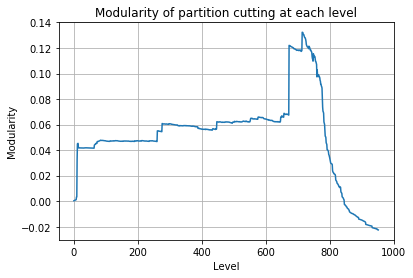

In [101]:
plt.plot(levels, mods)

plt.xlabel('Level')
plt.ylabel('Modularity')
plt.title('Modularity of partition cutting at each level')
plt.grid(True)

plt.show()

In [129]:
#Demon (eps = 0.2)
current_time = time.time()
demEx = dem.Demon(graph=G0, min_community_size=3, epsilon=0.2)
dm2 = demEx.execute()
print(len(dm2))
print (time.time()-current_time)
resdm = pquality_summary(G0, dm2)
for _, v in resdm.items():
    print(v)

Exec: 100%|████████████████████████

Time:  'execute' 2.76 sec
------------------------------------


8
2.758341073989868
                            value
Index                            
Modularity (no overlap) -0.077668
                         min          max          avg          std
Index                                                              
Internal Density    0.006412     0.120879     0.041268     0.037617
Edges inside       44.000000  5017.000000  2464.250000  1979.018491
Average Degree      4.900000    25.597990    14.928566     7.362843
FOMD                0.949749     1.000000     0.991388     0.015916
TPR                 1.000000     1.000000     1.000000     0.000000
Expansion           0.570288    64.214286    24.131272    25.937719
Cut Ratio           0.001733     0.068240     0.027124     0.026780
Conductance         0.034357     0.922037     0.431208     0.372633
Normalized Cut      0.320624     1.019342     0.648827     0.282088
Maximum-ODF       186.000000   715.000000   482.750000   204.642218
Average-ODF         0.570288    64.214286    24.131272    25.9

In [128]:
#Demon (eps = 0.4)
current_time = time.time()
demEx = dem.Demon(graph=G0, min_community_size=3, epsilon=0.4)
dm4 = demEx.execute()
print(len(dm4))
print (time.time()-current_time)
resdm = pquality_summary(G0, dm4)
for _, v in resdm.items():
    print(v)

Exec: 100%|████████████████████████

Time:  'execute' 2.80 sec
------------------------------------


17
2.7972476482391357
                            value
Index                            
Modularity (no overlap) -0.259895
                        min          max          avg          std
Index                                                             
Internal Density   0.007685     0.250000     0.104181     0.090663
Edges inside       6.000000  4391.000000  1487.176471  1821.213307
Average Degree     3.000000    25.598291    13.420623     6.322842
FOMD               0.939394     1.000000     0.991602     0.015245
TPR                1.000000     1.000000     1.000000     0.000000
Expansion          1.209346   179.750000    44.190359    45.867527
Cut Ratio          0.002879     0.189012     0.048083     0.047883
Conductance        0.068618     0.983584     0.580462     0.344333
Normalized Cut     0.306924     1.045798     0.751220     0.281982
Maximum-ODF       82.000000   719.000000   487.117647   212.569679
Average-ODF        1.209346   179.750000    44.190359    45.867527
Flake

In [130]:
#Demon (eps = 0.6)
current_time = time.time()
demEx = dem.Demon(graph=G0, min_community_size=3, epsilon=0.6)
dm6 = demEx.execute()
print(len(dm6))
print (time.time()-current_time)
resdm = pquality_summary(G0, dm6)
for _, v in resdm.items():
    print(v)

Exec: 100%|████████████████████████

Time:  'execute' 2.77 sec
------------------------------------


37
2.7751097679138184
                           value
Index                           
Modularity (no overlap) -0.03669
                        min          max         avg          std
Index                                                            
Internal Density   0.008218     0.250000    0.141992     0.080583
Edges inside       6.000000  4375.000000  728.675676  1077.204542
Average Degree     3.000000    26.433333   14.657617     8.260237
FOMD               0.857143     1.000000    0.986724     0.029251
TPR                1.000000     1.000000    1.000000     0.000000
Expansion          1.354776   190.833333   68.750808    50.248549
Cut Ratio          0.003065     0.201089    0.074116     0.052083
Conductance        0.074466     0.983584    0.721912     0.242312
Normalized Cut     0.313248     1.071901    0.883376     0.190335
Maximum-ODF       82.000000   719.000000  579.945946   178.304620
Average-ODF        1.354776   190.833333   68.750808    50.248549
Flake-ODF          0.

In [131]:
#Demon (eps = 0.8)
current_time = time.time()
demEx = dem.Demon(graph=G0, min_community_size=3, epsilon=0.8)
dm8 = demEx.execute()
print(len(dm8))
print (time.time()-current_time)
resdm = pquality_summary(G0, dm8)
for _, v in resdm.items():
    print(v)

Exec: 100%|████████████████████████

Time:  'execute' 2.80 sec
------------------------------------


71
2.804797410964966
                            value
Index                            
Modularity (no overlap) -0.009818
                        min          max         avg         std
Index                                                           
Internal Density   0.008258     0.250000    0.153736    0.082675
Edges inside       5.000000  4338.000000  635.774648  928.560664
Average Degree     2.500000    29.617021   13.459804    8.985892
FOMD               0.750000     1.000000    0.992500    0.030808
TPR                1.000000     1.000000    1.000000    0.000000
Expansion          1.354776   327.250000  100.855598   85.253535
Cut Ratio          0.003065     0.344111    0.107708    0.088671
Conductance        0.074165     0.990916    0.758772    0.243717
Normalized Cut     0.316410     1.109980    0.917709    0.183512
Maximum-ODF       82.000000   720.000000  603.788732  158.687213
Average-ODF        1.354776   327.250000  100.855598   85.253535
Flake-ODF          0.003899     

In [134]:
#Demon (eps = 0.95)
current_time = time.time()
demEx = dem.Demon(graph=G0, min_community_size=3, epsilon=0.95)
dm95 = demEx.execute()
print(len(dm95))
print (time.time()-current_time)
resdm = pquality_summary(G0, dm95)
for _, v in resdm.items():
    print(v)

Exec: 100%|████████████████████████

Time:  'execute' 2.87 sec
------------------------------------


100
2.8714044094085693
                            value
Index                            
Modularity (no overlap)  0.005437
                         min          max         avg         std
Index                                                            
Internal Density    0.008275     0.250000    0.178599    0.073857
Edges inside        5.000000  4347.000000  452.230000  801.189988
Average Degree      2.500000    33.855072   12.491645    8.842833
FOMD                0.750000     1.000000    0.991451    0.030748
TPR                 1.000000     1.000000    1.000000    0.000000
Expansion           1.362573   327.250000  119.896818   80.837264
Cut Ratio           0.003083     0.344111    0.127541    0.084164
Conductance         0.074417     0.990916    0.816354    0.217599
Normalized Cut      0.319251     1.122054    0.965611    0.164124
Maximum-ODF       193.000000   720.000000  631.770000  142.551875
Average-ODF         1.362573   327.250000  119.896818   80.837264
Flake-ODF        

In [148]:
nf = NF1(kc3, lp)
results = nf.summary()
print(results['scores'])
print(results['details'])

                              Value
Index                              
Ground Truth Communities  13.000000
Identified Communities    10.000000
Community Ratio            0.769231
Ground Truth Matched       0.461538
Node Coverage              0.712042
NF1                        0.143169
   F1 min  F1 max  F1 mean  F1 mode    F1 std
0     0.0     1.0    0.517      0.0  0.424948


In [149]:
nf = NF1(kc3, lo)
results = nf.summary()
print(results['scores'])
print(results['details'])

                              Value
Index                              
Ground Truth Communities  15.000000
Identified Communities    10.000000
Community Ratio            0.666667
Ground Truth Matched       0.333333
Node Coverage              0.712042
NF1                        0.054833
   F1 min  F1 max  F1 mean  F1 mode    F1 std
0    0.01     1.0    0.329     0.01  0.416736


In [150]:
nf = NF1(kc3, gn)
results = nf.summary()
print(results['scores'])
print(results['details'])

                               Value
Index                               
Ground Truth Communities  716.000000
Identified Communities     10.000000
Community Ratio             0.013966
Ground Truth Matched        0.013966
Node Coverage               0.712042
NF1                         0.010796
   F1 min  F1 max  F1 mean  F1 mode  F1 std
0    0.12     1.0    0.773      0.8  0.2283


In [151]:
nf = NF1(kc3, dm95)
results = nf.summary()
print(results['scores'])
print(results['details'])

                               Value
Index                               
Ground Truth Communities  100.000000
Identified Communities     10.000000
Community Ratio             0.100000
Ground Truth Matched        0.030000
Node Coverage               1.022556
NF1                         0.007590
   F1 min  F1 max   F1 mean  F1 mode  F1 std
0    0.75     0.9  0.843333     0.75  0.0665


In [152]:
nf = NF1(lp, lo)
results = nf.summary()
print(results['scores'])
print(results['details'])

                              Value
Index                              
Ground Truth Communities  15.000000
Identified Communities    13.000000
Community Ratio            0.866667
Ground Truth Matched       0.466667
Node Coverage              1.000000
NF1                        0.098193
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0    0.01     1.0  0.390769     0.01  0.439746


In [153]:
nf = NF1(lp, gn)
results = nf.summary()
print(results['scores'])
print(results['details'])

                               Value
Index                               
Ground Truth Communities  716.000000
Identified Communities     13.000000
Community Ratio             0.018156
Ground Truth Matched        0.016760
Node Coverage               1.000000
NF1                         0.013328
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0    0.08     1.0  0.861538      1.0  0.268811


In [154]:
nf = NF1(lp, dm95)
results = nf.summary()
print(results['scores'])
print(results['details'])

                               Value
Index                               
Ground Truth Communities  100.000000
Identified Communities     13.000000
Community Ratio             0.130000
Ground Truth Matched        0.070000
Node Coverage               1.436090
NF1                         0.023208
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0    0.02    0.95  0.615714     0.75  0.308353


In [155]:
nf = NF1(lo, gn)
results = nf.summary()
print(results['scores'])
print(results['details'])

                               Value
Index                               
Ground Truth Communities  716.000000
Identified Communities     15.000000
Community Ratio             0.020950
Ground Truth Matched        0.020950
Node Coverage               1.000000
NF1                         0.014861
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0    0.06     1.0  0.709375      1.0  0.332048


In [156]:
nf = NF1(lo, dm95)
results = nf.summary()
print(results['scores'])
print(results['details'])

                               Value
Index                               
Ground Truth Communities  100.000000
Identified Communities     15.000000
Community Ratio             0.150000
Ground Truth Matched        0.100000
Node Coverage               1.436090
NF1                         0.026667
   F1 min  F1 max  F1 mean  F1 mode    F1 std
0    0.01    0.95      0.4     0.02  0.351359


In [157]:
nf = NF1(gn, dm95)
results = nf.summary()
print(results['scores'])
print(results['details'])

                               Value
Index                               
Ground Truth Communities  100.000000
Identified Communities    716.000000
Community Ratio             7.160000
Ground Truth Matched        0.960000
Node Coverage               1.436090
NF1                         0.004571
   F1 min  F1 max   F1 mean  F1 mode    F1 std
0     0.0    0.95  0.035511     0.01  0.092627


In [128]:
cgn = list(nxcm.girvan_newman(G0))

In [127]:
current_time = time.time()
cgnTime = list(nxcm.girvan_newman(G0))
print (time.time()-current_time)

1285.8332209587097


In [128]:
len(cgnTime)

850

In [268]:
communityCounter= 0
nodeCommunityDict = {}
for comm in lo:
    for n in comm:
        nodeCommunityDict [n] = communityCounter
    communityCounter += 1

In [311]:
GWithCom = G0

In [312]:
len(GWithCom.nodes())

851

In [313]:
nx.set_node_attributes(GWithCom, nodeCommunityDict, 'communityLo')

In [314]:
GWithCom.node[7]['communityLo']

4

In [316]:
nx.relabel_nodes(GWithCom, LableToIntID, copy=False)  #LableToIntID

In [307]:
GWithCom.node[5]['communityLo']

0

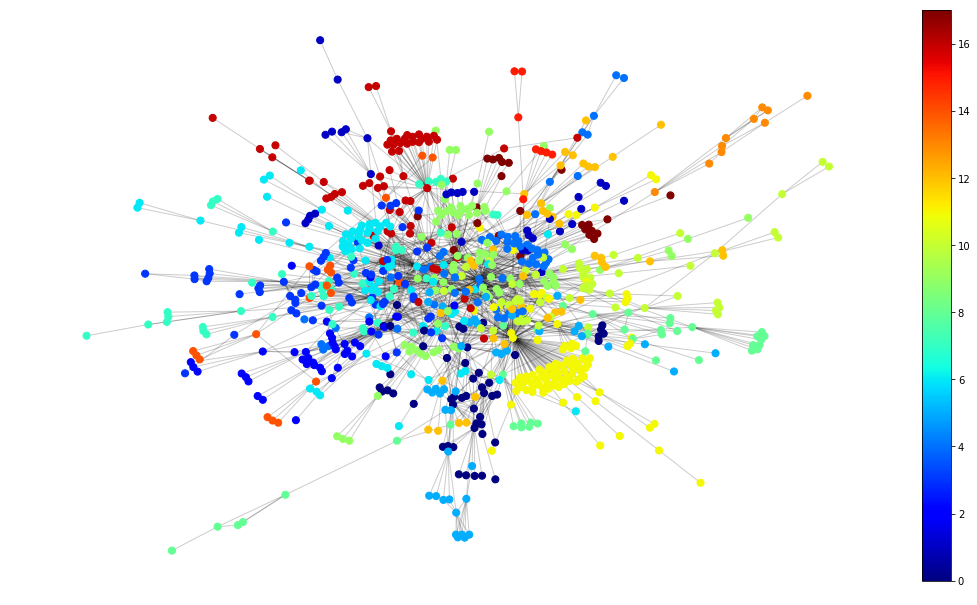

In [309]:
from itertools import count
fig, ax = plt.subplots()
# get unique groups
groups = set(nx.get_node_attributes(GWithCom,'communityLo').values())
mapping = dict(zip(sorted(groups),count()))
nodes = GWithCom.nodes()
colors = [mapping[GWithCom.node[n]['communityLo']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(GWithCom)
ec = nx.draw_networkx_edges(GWithCom, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(GWithCom, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=50, cmap=plt.cm.jet)
fig.set_size_inches(18.5, 10.5)
plt.colorbar(nc)
plt.axis('off')
fig.savefig('LouvainRes.png', dpi=100)
plt.show()